### Imports

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
%matplotlib notebook

#adding dependencies for API pulls
import requests
from pprint import pprint
from config import access_key

### Covid Code

### Currency Code

In [19]:
#By Stacey D.
#pprint the json to see what it looks like
url = "http://api.exchangeratesapi.io/v1/"
symbols = "brl,cad,cny,eur,inr,jpy,mxn,usd"
date = "2020-01-02"
query_url = (f"{url}{date}?access_key={access_key}&symbols={symbols}")

response = requests.get(query_url).json()
pprint(response)

#making lists to store information from get
query_date = []
brazil_brl = []
canada_cad = []
china_cny = []
germany_eur = []
india_inr = []
japan_jpy = []
mexico_mxn = []
us_usd = []


#make list of dates for 2019 - 2020
dates20102020 = pd.date_range(start='2010-01-01', end='2020-12-01', freq='MS')
list20102020 = []
for i in dates20102020:
  list20102020.append(i.strftime('%Y-%m-%d'))

{'base': 'EUR',
 'date': '2020-01-02',
 'historical': True,
 'rates': {'BRL': 4.496162,
           'CAD': 1.450594,
           'CNY': 7.779846,
           'EUR': 1,
           'INR': 79.787978,
           'JPY': 121.25482,
           'MXN': 21.051849,
           'USD': 1.117088},
 'success': True,
 'timestamp': 1578009599}


In [20]:
#create loop for API call
counter = 1
print("Beginning Data Retrieval")
print("------------------------------------")
for date in list20102020:
    query_url = (f"{url}{date}?access_key={access_key}&symbols={symbols}")
    response = requests.get(query_url).json()
    query_date.append(response['date'])
    brazil_brl.append(response['rates']['BRL'])
    china_cny.append(response['rates']['CNY'])
    canada_cad.append(response['rates']['CAD'])
    germany_eur.append(response['rates']['EUR'])
    india_inr.append(response['rates']['INR'])
    japan_jpy.append(response['rates']['JPY'])
    mexico_mxn.append(response['rates']['MXN'])
    us_usd.append(response['rates']['USD'])
    print(f"Processing Record # {counter} | {date}")
    
    counter +=1


Beginning Data Retrieval
------------------------------------
Processing Record # 1 | 2010-01-01
Processing Record # 2 | 2010-02-01
Processing Record # 3 | 2010-03-01
Processing Record # 4 | 2010-04-01
Processing Record # 5 | 2010-05-01
Processing Record # 6 | 2010-06-01
Processing Record # 7 | 2010-07-01
Processing Record # 8 | 2010-08-01
Processing Record # 9 | 2010-09-01
Processing Record # 10 | 2010-10-01
Processing Record # 11 | 2010-11-01
Processing Record # 12 | 2010-12-01
Processing Record # 13 | 2011-01-01
Processing Record # 14 | 2011-02-01
Processing Record # 15 | 2011-03-01
Processing Record # 16 | 2011-04-01
Processing Record # 17 | 2011-05-01
Processing Record # 18 | 2011-06-01
Processing Record # 19 | 2011-07-01
Processing Record # 20 | 2011-08-01
Processing Record # 21 | 2011-09-01
Processing Record # 22 | 2011-10-01
Processing Record # 23 | 2011-11-01
Processing Record # 24 | 2011-12-01
Processing Record # 25 | 2012-01-01
Processing Record # 26 | 2012-02-01
Processing 

In [21]:
#make DF from lists
currency_df = pd.DataFrame()
currency_df["Date"] = query_date
currency_df["Germany-EUR"] = germany_eur
currency_df["Brazil-BRL"] = brazil_brl
currency_df["Canada-CAD"] = canada_cad
currency_df["China-CNY"] = china_cny
currency_df["India-INR"] = india_inr
currency_df["Japan-JPY"] = japan_jpy
currency_df["Mexico-MXN"] = mexico_mxn
currency_df["USA-USD"] = us_usd


<IPython.core.display.Javascript object>


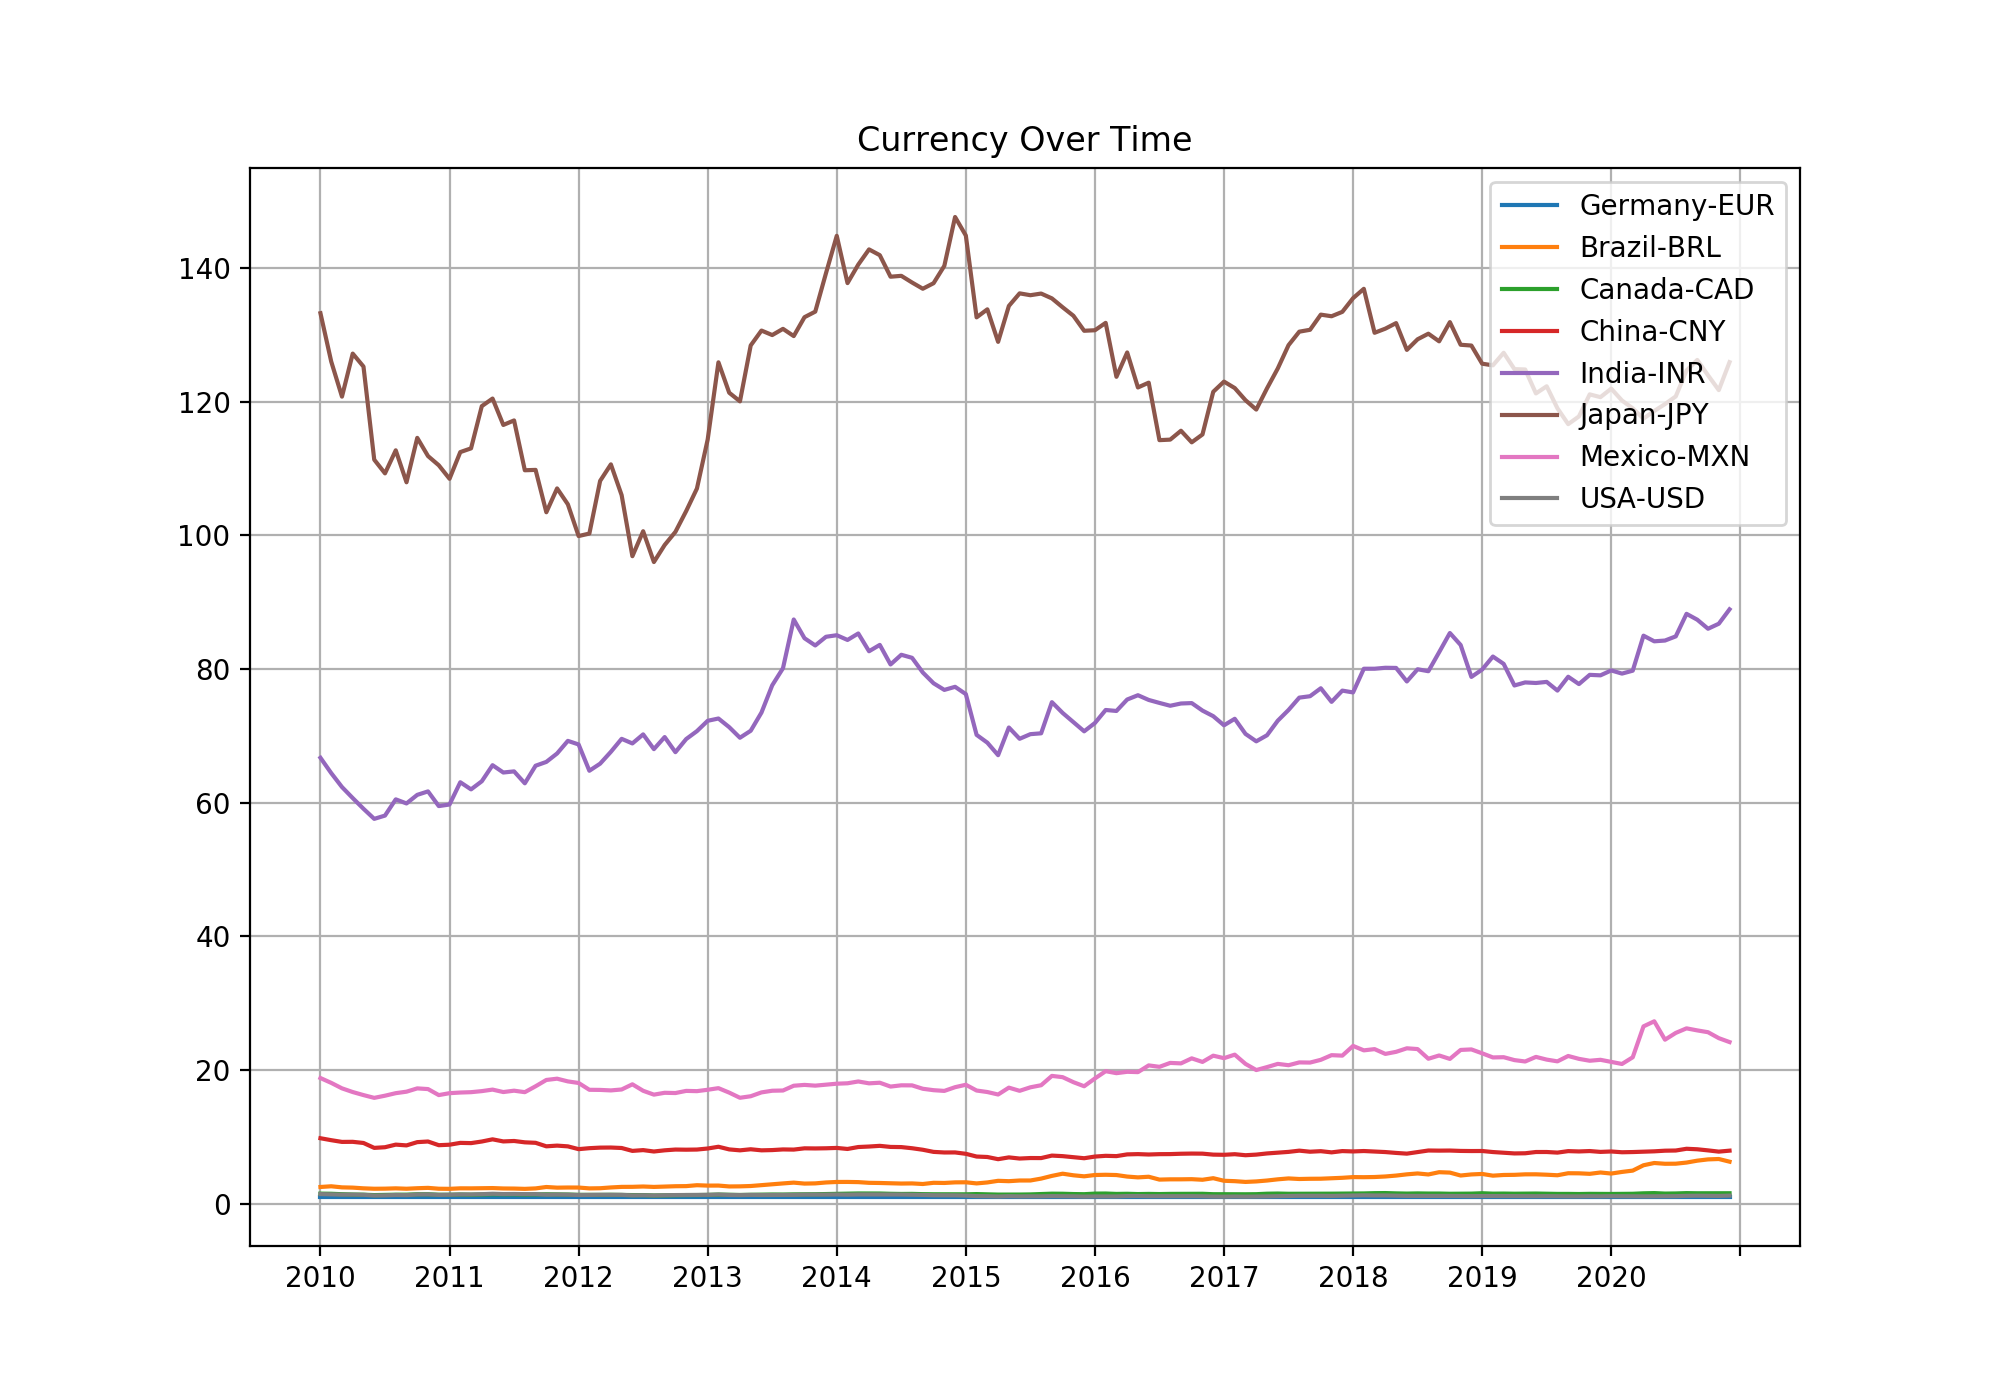

In [22]:
#import data I have already run so you don't have to run it the API every time
filepath = ("Resources/currencyDF.csv")
currency_df =pd.read_csv(filepath)

positions=(0,12,24,36,48,60,72,84,96,108,120,132)
labels=("2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020")
currency_df.plot(figsize = (10,7), title="Currency Over Time",legend='best')
plt.xticks(positions, labels)
plt.grid()
plt.show()

In [11]:
#change "Date" column to datetime to extract year, so i can create a new DF for only 2020
df["Date"] = pd.to_datetime(df["Date"])
df["year"] = df["Date"].dt.year
df_2020 = df.loc[df["year"]==2020]
columns = ['Date','Germany-EUR','Brazil-BRL','Canada-CAD','China-CNY','India-INR','Japan-JPY','Mexico-MXN','USA-USD']
df_2020_clean = pd.DataFrame(df_2020, columns=columns,)
df_2020_clean.head()
df_2020_clean["Date"] = df_2020_clean["Date"].astype(str)
#renaming to something more obvious
currency_df_2020 = pd.DataFrame(df_2020_clean)

currency_df_2020.head()

#currency_df_2020.to_csv("Output/currencyDF2020.csv", index=False, header=True)


,Date,Germany-EUR,Brazil-BRL,Canada-CAD,China-CNY,India-INR,Japan-JPY,Mexico-MXN,USA-USD
120,2020-01-01,1,4.509417,1.455630,7.811525,79.797425,121.963096,21.218065,1.121830
121,2020-02-01,1,4.751138,1.468314,7.695787,79.323176,120.190138,20.905659,1.109430
122,2020-03-01,1,4.949467,1.481713,7.726669,79.759766,119.018569,21.909084,1.105088
123,2020-04-01,1,5.750017,1.550209,7.776977,85.000994,117.484297,26.531547,1.095303
124,2020-05-01,1,6.087341,1.582211,7.834678,84.154222,118.623218,27.292898,1.109350


<IPython.core.display.Javascript object>


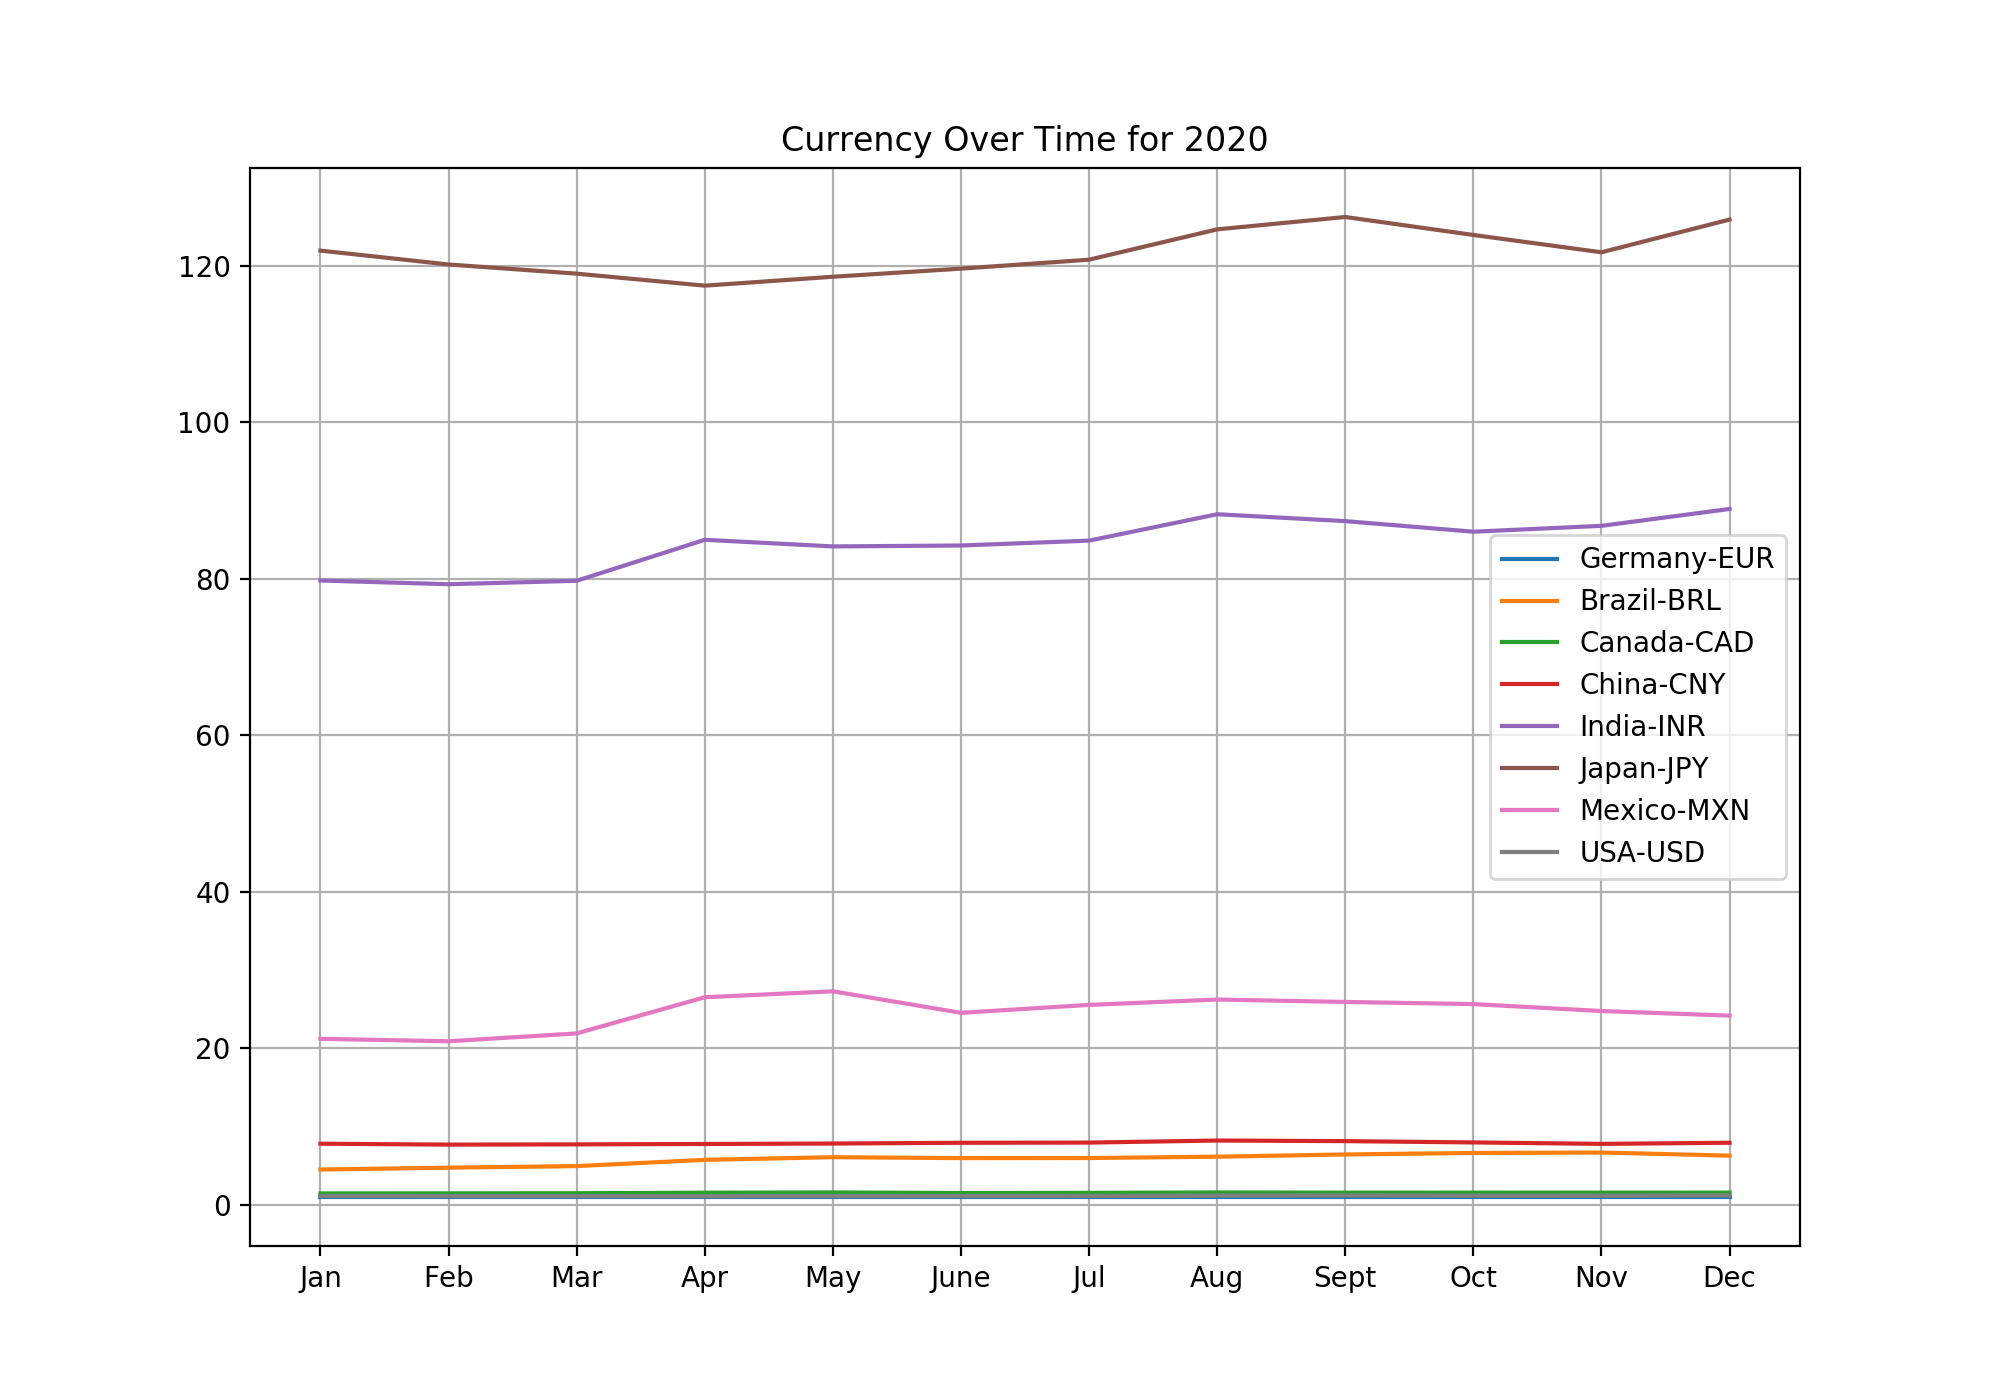

In [14]:
positions=(120,121,122,123,124,125,126,127,128,129,130,131)
labels=("Jan","Feb","Mar","Apr","May","June", "Jul","Aug","Sept","Oct","Nov","Dec")
currency_df_2020.plot(figsize = (10,7), title= "Currency Over Time for 2020")
plt.xticks(positions, labels)
plt.grid()
plt.show()

### Stock Code

#### Stock % Changes by Day in 2020

In [3]:
# Import data
brazil_2020_orig = pd.read_csv("Resources/Brazil_inBRL_Bovespa_2020Data.csv")
canada_2020_orig = pd.read_csv("Resources/Canada_inCND_S&PTSXComposite_2020Data.csv")
china_2020_orig = pd.read_csv("Resources/China_inCNY_ShanghaiComposite_2020Data.csv")
germany_2020_orig = pd.read_csv("Resources/Germany_inEUR_DAX_2020Data.csv")
india_2020_orig = pd.read_csv("Resources/India_inINR_BSESensex30_2020Data.csv")
japan_2020_orig = pd.read_csv("Resources/Japan_inJPY_Nikkei225_2020Data.csv")
mexico_2020_orig = pd.read_csv("Resources/Mexico_inMXN_S&PBMVIPC_2020Data.csv")
usa_2020_orig = pd.read_csv("Resources/USA_inUSD_DowJones_2020Data.csv")

# Create a function to clean up each of the data sets
 
def clean_orig(orig_df):
    # Convert object to string and remove '%'
    orig_df['Change %'] = orig_df['Change %'].str.replace("%","")
    
    # Convert to float
    orig_df['Change %'] = orig_df['Change %'].astype(float)

    # Clean up the Date field and convert to a time/date
    orig_df['Date']= pd.to_datetime(orig_df['Date'], format='%b %d, %Y')

    # Sort so the date starts with January 1 as the first row and not the last
    orig_df = orig_df.sort_values(by='Date',ascending=True)
    
    # Drop columns we don't need
    return orig_df.drop(columns=['Price', 'Open', 'High', 'Low', 'Vol.'])
    
# Run the function and create data frames for each country
brazil_2020 = clean_orig(brazil_2020_orig)
canada_2020 = clean_orig(canada_2020_orig)
china_2020 = clean_orig(china_2020_orig)
germany_2020 = clean_orig(germany_2020_orig)
india_2020 = clean_orig(india_2020_orig)
japan_2020 = clean_orig(japan_2020_orig)
mexico_2020 = clean_orig(mexico_2020_orig)
usa_2020 = clean_orig(usa_2020_orig)

# Merge data frames into one 
df1 = brazil_2020.merge(canada_2020, how='outer', on='Date', sort=True)
df2 = df1.merge(china_2020, how='outer', on='Date', sort=True)
df3 = df2.merge(germany_2020, how='outer', on='Date', sort=True)
df4 = df3.merge(india_2020, how='outer', on='Date', sort=True)
df5 = df4.merge(japan_2020, how='outer', on='Date', sort=True)
df6 = df5.merge(mexico_2020, how='outer', on='Date', sort=True)
stocks_2020_df = df6.merge(usa_2020, how='outer', on='Date', sort=True)
stocks_2020_df.columns = ('Date','Brazil Bovespa (%)','Canada S&P TSX Composite (%)',
                     'China Shanghai Composite (%)','Germany DAX (%)',
                     'India BSE Sensex 30 (%)','Japan Nikkei 225 (%)',
                     'Mexico S&P BMV IPC (%)','USA Down Jones (%)')

stocks_2020_df.head()

,Date,Brazil Bovespa (%),Canada S&P TSX Composite (%),China Shanghai Composite (%),Germany DAX (%),India BSE Sensex 30 (%),Japan Nikkei 225 (%),Mexico S&P BMV IPC (%),USA Down Jones (%)
0,2020-01-01,NaN,NaN,NaN,NaN,0.13,NaN,NaN,NaN
1,2020-01-02,2.53,0.21,1.15,1.03,0.78,NaN,2.06,1.16
2,2020-01-03,-0.73,-0.20,-0.05,-1.25,-0.39,NaN,0.42,-0.81
3,2020-01-06,-0.70,0.23,-0.01,-0.70,-1.90,-1.91,-0.29,0.24
4,2020-01-07,-0.18,0.37,0.69,0.76,0.47,1.60,-0.76,-0.42


<IPython.core.display.Javascript object>


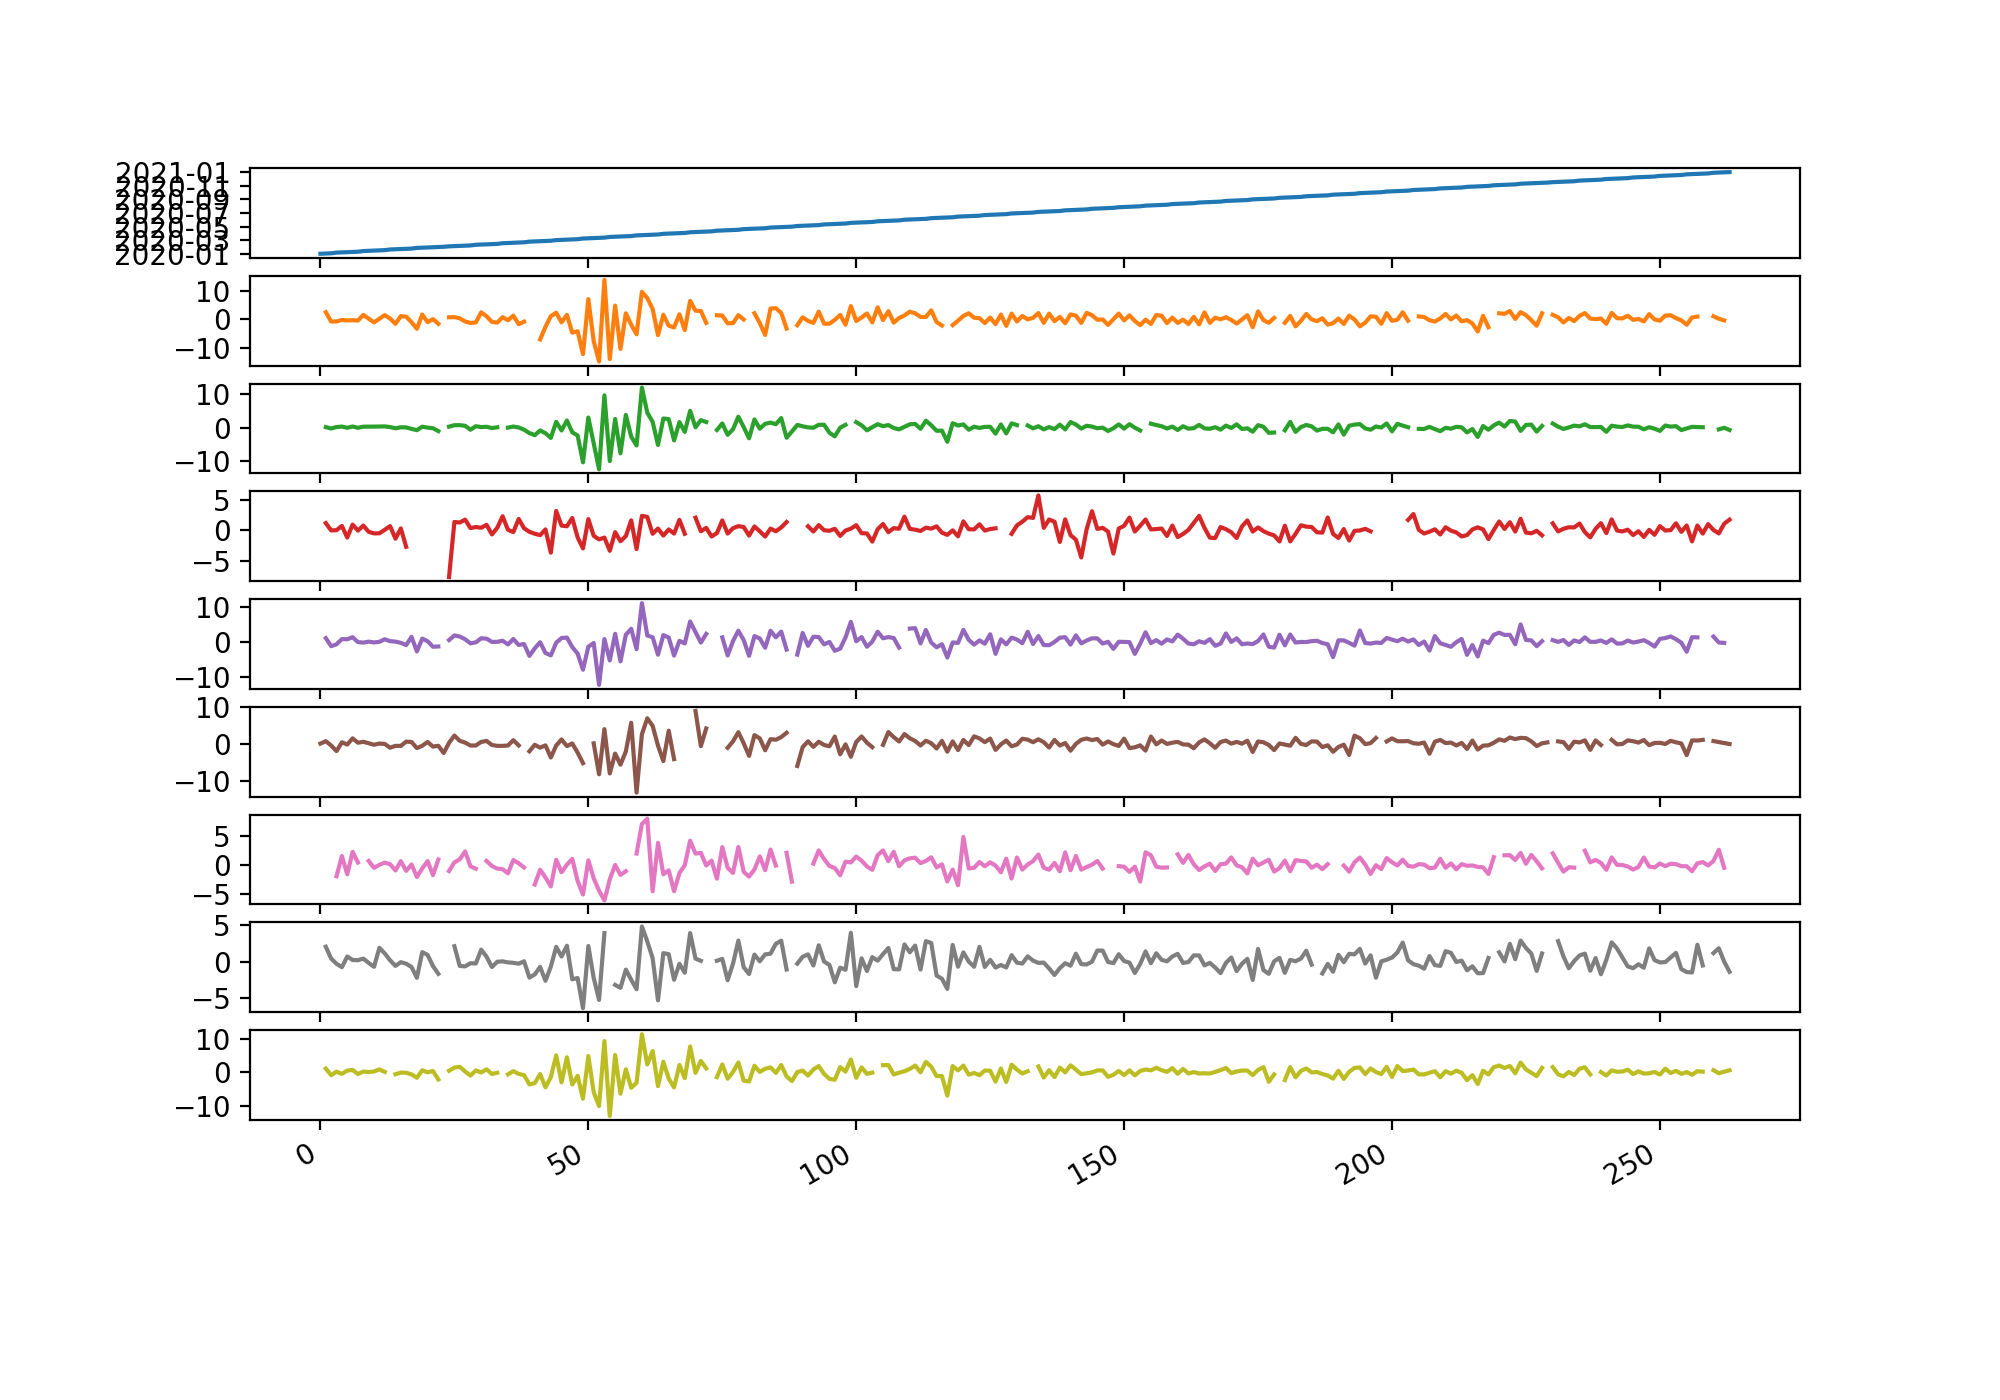

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9da8a776a0>,
      dtype=object)

In [6]:
# Quick and dirty display just as a preview

stocks_2020_df.plot(figsize=(10, 7), subplots=True, legend=False)


#### Stock % Changes by Month from 2010–2020

In [7]:
# Import data
brazil_10_orig = pd.read_csv("Resources/Brazil_10year_monthly.csv")
canada_10_orig = pd.read_csv("Resources/Canada_10year_monthly.csv")
china_10_orig = pd.read_csv("Resources/China_10year_monthly.csv")
germany_10_orig = pd.read_csv("Resources/Germany_10year_monthly.csv")
india_10_orig = pd.read_csv("Resources/India_10year_monthly.csv")
japan_10_orig = pd.read_csv("Resources/Japan_10year_monthly.csv")
mexico_10_orig = pd.read_csv("Resources/Mexico_10year_monthly.csv")
usa_10_orig = pd.read_csv("Resources/USA_10year_monthly.csv")

# Create a function to clean up each of the data sets

def clean_orig_10(orig_df_10):
    # Convert object to string and remove '%'
    orig_df_10['Change %'] = orig_df_10['Change %'].str.replace("%","")
    
    # Convert to float
    orig_df_10['Change %'] = orig_df_10['Change %'].astype(float)

    # Clean up the Date field anc convert to a time/date
    orig_df_10['Date'] = orig_df_10['Date'].str.replace("Dec ","12/01/")\
                    .str.replace("Jan ","01/01/").str.replace("Feb ","02/01/").str.replace("Mar ","03/01/").str.replace("Apr ","04/01/")\
                    .str.replace("May ","05/01/").str.replace("Jun ","06/01/").str.replace("Jul ","07/01/").str.replace("Aug ","08/01/")\
                    .str.replace("Sep ","09/01/").str.replace("Oct ","10/01/").str.replace("Nov ","11/01/")
    orig_df_10['Date']= pd.to_datetime(orig_df_10['Date'])
    
    orig_df_10 = orig_df_10.sort_values(by='Date',ascending=True)
    
    # Drop columns we don't need
    return orig_df_10.drop(columns=['Price', 'Open', 'High', 'Low', 'Vol.'])
    
# Run the function and create data frames for each country
brazil_10yr = clean_orig_10(brazil_10_orig)
canada_10yr = clean_orig_10(canada_10_orig)
china_10yr = clean_orig_10(china_10_orig)
germany_10yr = clean_orig_10(germany_10_orig)
india_10yr = clean_orig_10(india_10_orig)
japan_10yr = clean_orig_10(japan_10_orig)
mexico_10yr = clean_orig_10(mexico_10_orig)
usa_10yr = clean_orig_10(usa_10_orig)

# Merge data frames into one 
st1 = brazil_10yr.merge(canada_10yr, how='outer', on='Date', sort=True)
st2 = st1.merge(china_10yr, how='outer', on='Date', sort=True)
st3 = st2.merge(germany_10yr, how='outer', on='Date', sort=True)
st4 = st3.merge(india_10yr, how='outer', on='Date', sort=True)
st5 = st4.merge(japan_10yr, how='outer', on='Date', sort=True)
st6 = st5.merge(mexico_10yr, how='outer', on='Date', sort=True)
stocks_10yr_df = st6.merge(usa_10yr, how='outer', on='Date', sort=True)
stocks_10yr_df.columns = ('Date','Brazil Bovespa (%)','Canada S&P TSX Composite (%)',
                     'China Shanghai Composite (%)','Germany DAX (%)',
                     'India BSE Sensex 30 (%)','Japan Nikkei 225 (%)',
                     'Mexico S&P BMV IPC (%)','USA Down Jones (%)')

stocks_10yr_df.head()

,Date,Brazil Bovespa (%),Canada S&P TSX Composite (%),China Shanghai Composite (%),Germany DAX (%),India BSE Sensex 30 (%),Japan Nikkei 225 (%),Mexico S&P BMV IPC (%),USA Down Jones (%)
0,2010-01-01,-4.65,-5.55,-8.78,-5.85,-6.34,-3.30,-5.38,-3.46
1,2010-02-01,1.68,4.83,2.10,-0.18,0.44,-0.71,4.09,2.56
2,2010-03-01,5.82,3.51,1.87,9.92,6.68,9.52,5.16,5.15
3,2010-04-01,-4.04,1.44,-7.67,-0.29,0.18,-0.29,-1.74,1.40
4,2010-05-01,-6.64,-3.67,-9.70,-2.79,-3.50,-11.65,-1.98,-7.92


<IPython.core.display.Javascript object>


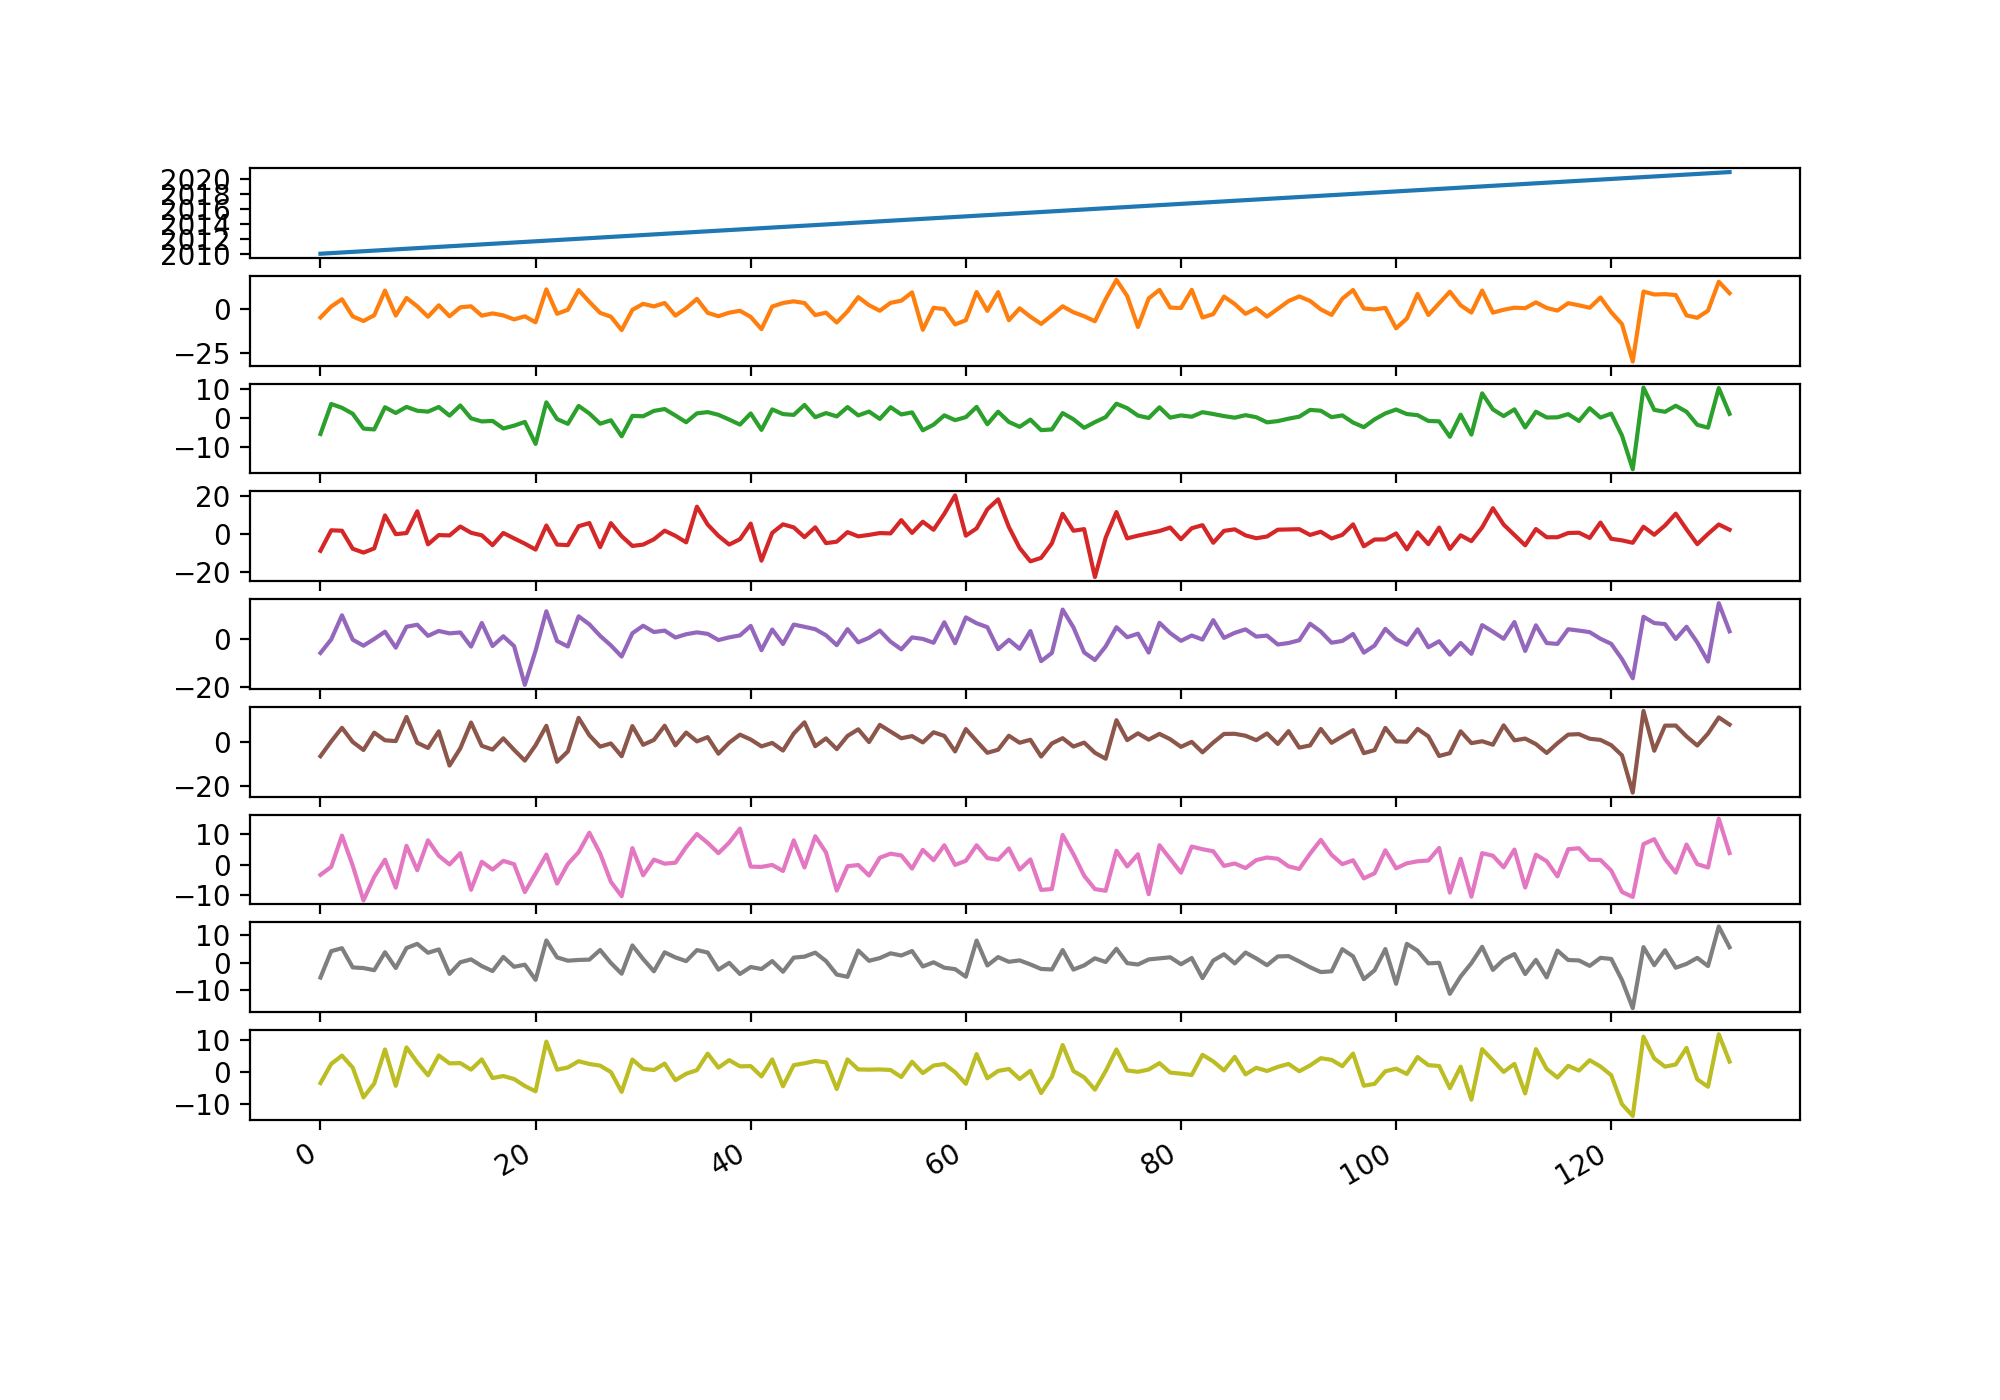

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f94b91fcc50>,
      dtype=object)

In [162]:
# Quick and dirty display 
stocks_10yr_df.plot(figsize=(10, 7), subplots=True, legend=False)


### Question 1: How do countries rate on per-capital covid deaths?

* Bar graph: per-capita deaths by country
    
* Line graph: per capita deaths over time

### Question 2: 

### Question 3:

### Analysis